In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# from google.colab import drive
# import zipfile
# import os


# # Step 2: Define the path to the zip file and the directory to extract to
# zip_file_path = '/content/drive/MyDrive/Soil Classification/soil_dataset.zip'
# extract_to_path = '/content/drive/MyDrive/Soil Classification/soil_dataset_unzipped/'

# # Step 3: Create the extraction directory if it doesn't exist
# os.makedirs(extract_to_path, exist_ok=True)

# # Step 4: Extract the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

# # Confirm the extraction
# extracted_files = os.listdir(extract_to_path)
# print("Extraction complete. Sample files extracted:", extracted_files[:10])

Extraction complete. Sample files extracted: ['soil_dataset']


In [ ]:
pip install vit_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: go

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from vit_keras import vit
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
train_path ='/content/drive/MyDrive/Soil Classification/soil_dataset_unzipped/soil_dataset/train'
val_path = '/content/drive/MyDrive/Soil Classification/soil_dataset_unzipped/soil_dataset/valid'
test_path = '/content/drive/MyDrive/Soil Classification/soil_dataset_unzipped/soil_dataset/test'

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 20
LEARNING_RATE = 1e-4
WEIGHTS_PATH = 'tea.h5' # Path to save weights

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
#                                    width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   fill_mode='nearest',
                                   brightness_range = [0.9, 1.2],
                                   vertical_flip=True,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)


Found 1203 images belonging to 7 classes.
Found 144 images belonging to 7 classes.
Found 157 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_model():
    vit_model = vit.vit_b16(
        image_size=IMAGE_SIZE,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False)

    model = tf.keras.Sequential([
        vit_model,
        Flatten(),
        Dense(7, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])

    return model

model = create_model()

347512832/347502902 [==============================] - 8s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE)

Epoch 1/20
75/75 [==============================] - 369s 5s/step - loss: 0.5961 - categorical_accuracy: 0.7928 - val_loss: 0.8144 - val_categorical_accuracy: 0.7500
Epoch 2/20
75/75 [==============================] - 341s 5s/step - loss: 0.2093 - categorical_accuracy: 0.9217 - val_loss: 1.1803 - val_categorical_accuracy: 0.6806
Epoch 3/20
75/75 [==============================] - 348s 5s/step - loss: 0.0587 - categorical_accuracy: 0.9773 - val_loss: 1.0741 - val_categorical_accuracy: 0.7639
Epoch 4/20
75/75 [==============================] - 348s 5s/step - loss: 0.0929 - categorical_accuracy: 0.9697 - val_loss: 1.0339 - val_categorical_accuracy: 0.7569
Epoch 5/20
75/75 [==============================] - 344s 5s/step - loss: 0.0613 - categorical_accuracy: 0.9806 - val_loss: 0.9001 - val_categorical_accuracy: 0.7847
Epoch 6/20
75/75 [==============================] - 340s 5s/step - loss: 0.2396 - categorical_accuracy: 0.9351 - val_loss: 0.6851 - val_categorical_accuracy: 0.8125
Epoch 7/20

In [ ]:
model.save_weights(WEIGHTS_PATH)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 7)                 5383      
                                                                 
Total params: 85,804,039
Trainable params: 85,804,039
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = create_model()
model.load_weights(WEIGHTS_PATH)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assume the model.predict() call returns a predictions object
predictions = model.predict(test_generator, verbose=0)

# Getting the index of the highest probability class per image
y_pred = np.argmax(predictions, axis=1)

# Getting the true labels per image
y_true = test_generator.classes

# Getting the class names (labels) from the generator
class_names = list(test_generator.class_indices.keys())

# Printing the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print("\nClassification Report:")
print(report)


Classification Report:
               precision    recall  f1-score   support

Alluvial Soil       1.00      0.57      0.73        40
   Black Soil       0.71      0.93      0.81        43
  Cinder Soil       0.76      1.00      0.87        13
Laterite Soil       0.69      1.00      0.82         9
    Peat Soil       0.90      0.56      0.69        16
     Red Soil       0.86      0.86      0.86        14
  Yellow Soil       0.92      1.00      0.96        22

     accuracy                           0.82       157
    macro avg       0.84      0.85      0.82       157
 weighted avg       0.85      0.82      0.81       157



In [ ]:
class_names

['Alluvial Soil',
 'Black Soil',
 'Cinder Soil',
 'Laterite Soil',
 'Peat Soil',
 'Red Soil',
 'Yellow Soil']

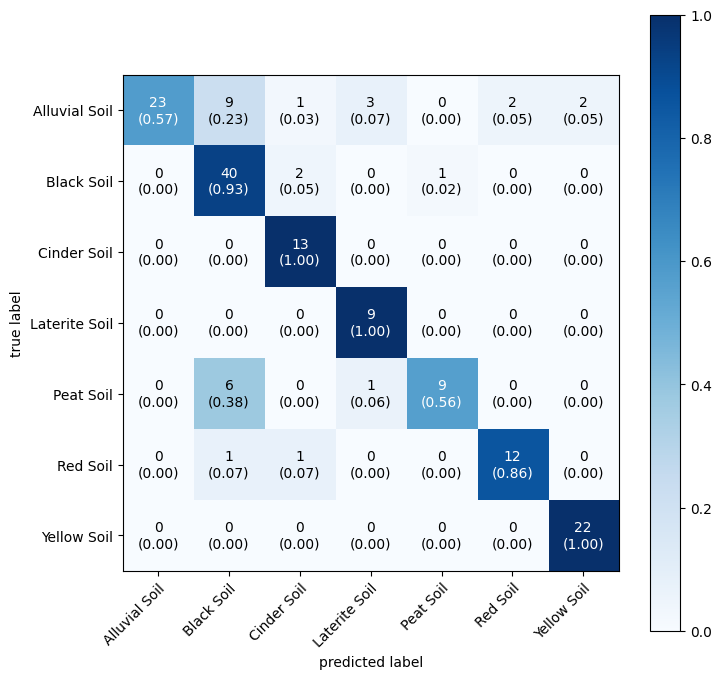

In [ ]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

# Compute confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using mlxtend's `plot_confusion_matrix`
figure, ax = plot_confusion_matrix(conf_mat=cm,
                                   show_absolute=True,
                                   show_normed=True,
                                   colorbar=True,
                                   class_names=class_names,
                                   figsize=(8, 8))
plt.show()

In [ ]:
import os
import shutil

# Source file path
source_path = '/content/tea.h5'

# Destination directory
destination_dir = '/content/drive/MyDrive/Soil Classification/soil_dataset_unzipped/soil_dataset'

# Check if the destination directory exists, create if it doesn't
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)
    print("Destination directory created.")

# Full path for the destination file
destination_path = os.path.join(destination_dir, 'tea.h5')

# Copy the file to the new location
shutil.copy(source_path, destination_path)

print("File copied successfully!")


File copied successfully!
